# **************** DRAFT *** DRAFT *** DRAFT ************

# Largest Glaciers in the World

This jupyter notebook provides an analysis the largest glaciers in the world using the Global Land Ice Measurements from Space (GLIMS) glacier outline database and the Randolph Glaicer Inventory (RGI) glacier outline database. The Global Terrestrial Network for Glaciers (GTN-G) has defined 19 glacier regions worldwide. The largest 3 glaciers in each of the 19 regions is examined here. 

**Note: In this draft only the GLIMS data are analyzed.**

### Background and Motivation

Glaciers are retreating at an alarming rate. Montana’s Glacier National Park had 150 glaciers in 1850; today only 25 remain and they are shrinking. Muir glacier in Alaska has retreated 31 miles since 1892 and is now only a fraction of its former grandeur measuring at only 11 miles long, today. 

Not only are glaciers a beautiful part of our landscape that are disappearing but in many parts of the world glaciers are a source of fresh water and energy through the use of the melt water. As these glaciers retreat, these nations will be out of water or need to find alternative forms of energy. Studying glaciers helps to inform our knowledge of climate change and helps water and energy resource managers plan for the future. Researchers have performed many regional studies of glaciers; however, global studies are scarce. Therefore, I am doing a global assessment of glaciers and glacial retreat to further our knowledge of these important natural resources on a worldwide scale. The outcome of the project will be an education and outreach blog post to help to inform people of the changes occurring in glaciers across the globe.

I'm doing this project in conjunction with the [World Glacier Monitoring Service](https://wgms.ch/) located at the University of Zurich. The WGMS compiles and disseminates standardized data on glacier fluctuations.

### Data Used

* GLIMS: http://www.glims.org/download/glims_db_20190304.tgz
  * GLIMS (Global Land Ice Measurements from Space) is a project designed to monitor the world's glaciers primarily using data from optical satellite instruments. It provides glacial outlines at multi-temporal resolution for glaciers around the world as shapefiles.
* RGI: https://www.glims.org/RGI/rgi60_dl.html
  * The Randolph Glacier Inventory (RGI) is a globally complete inventory of glacier outlines. Production of the RGI was motivated
by the preparation of the Fifth Assessment Report of the Intergovernmental Panel on Climate Change. It provides glacial outlines for glaciers around the world as shapefiles. The RGI is intended to be a snapshot of the world’s glaciers as they were near the beginning of the 21st century.
* GTN-G Regions: http://www.gtn-g.ch/database/GlacReg_2017.zip
  * Glacier regions are useful for regional assessments of glacier change and other parameters. This dataset, provided by the Global Terrestrial Network for Glaciers (GTN-G), defines 19 first-order glacier regions. The GTN-G is the framework for the internationally coordinated monitoring of glaciers and ice caps in support of the United Nations Framework Convention on Climate Change (UNFCCC).

In [1]:
import os
import os.path as op
import sys
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import polygon

# set working dir
HOME = op.join(op.expanduser("~"))
os.chdir(os.path.join(HOME, "git/wgms-glacier-project"))

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import scripts.wgms_scripts as ws

## The 19 Glacier Regions

The GTN-G has defined 19 glacier regions worldwide. A list of these regions plus a map is shown below.

In [2]:
# Open glacier region shapefile and display regions
glacier_regions_fp = "data/gtn-g-glacier-regions/cleaned/GTN-G_glacier_regions_201707_cleaned.shp"
glacier_regions = gpd.read_file(glacier_regions_fp)
glacier_regions.rename(columns = {'FULL_NAME': 'Region Name', 'RGI_CODE': 'Region Number'}, inplace=True)
print('List of the 19 glacier regions:')
print('')
print(glacier_regions[['Region Number', 'Region Name']].to_string(index=False))

List of the 19 glacier regions:

 Region Number                 Region Name
             1                      Alaska
             2      Western Canada and USA
             3        Arctic Canada, North
             4        Arctic Canada, South
             5         Greenland Periphery
             6                     Iceland
             7      Svalbard and Jan Mayen
             8                 Scandinavia
             9              Russian Arctic
            10                 Asia, North
            11              Central Europe
            12    Caucasus and Middle East
            13               Asia, Central
            14            Asia, South West
            15            Asia, South East
            16               Low Latitudes
            17              Southern Andes
            18                 New Zealand
            19  Antarctic and Subantarctic


In [3]:
# Open world map
world_bound_fp = 'data/ne_110m_land/ne_110m_land.shp'
world_bound = gpd.read_file(world_bound_fp)

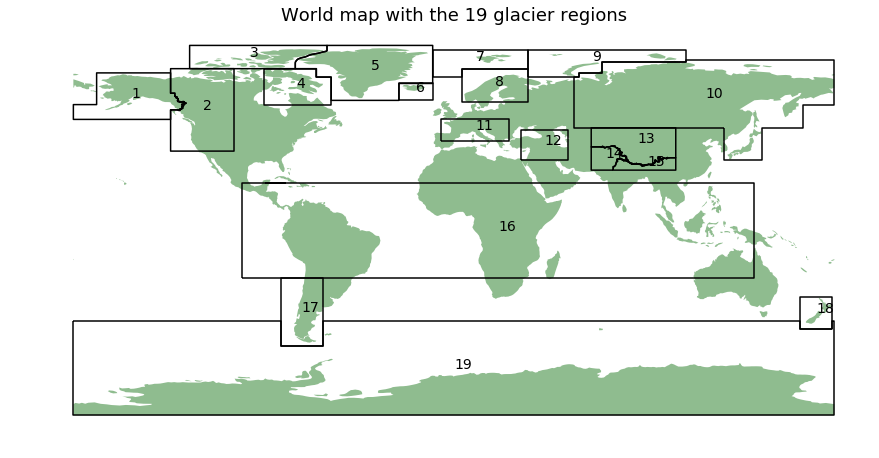

In [4]:
# Plot the the 19 regions each with their own color
fig, ax = plt.subplots(figsize=(15, 10))
world_bound.plot(ax=ax, color="darkseagreen")
glacier_regions.boundary.plot(ax=ax, color="black")
#glacier_regions.plot(ax=ax, cmap='tab20b', alpha=0.7) # plot the regions as transparent boxes with different colors
for x in range(0, 19):
    point = glacier_regions[x:x+1].centroid
    plt.text(point.x[x], point.y[x], str(x+1), fontsize=14)
    
ax.set_title('World map with the 19 glacier regions', fontsize=18)
ax.set_axis_off()

## Largest Glaciers for Each Region

In the sections below, the 10 largest glaciers from each region are listed with their size in m^2 and then the 3 largest are plotted with their size. Note: This is using GLIMS data only. RGI data will be added later.

### Region 1 - Alaska

In [5]:
# Open GLIMS region 1
glims_region_1_fp = "data/glims/processed/cleaned/glims_region_1_cleaned.shp"
glims_polygons_r1 = gpd.read_file(glims_region_1_fp)

In [6]:
# Open and print GLIMS Region 1 csv file with 10 largest glaciers
glims_largest_r1 = ws.print_10_largest_glims(1)

GLIMS 10 Largest glaciers and their size for Region 1 - Alaska:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G219787E60289N             3362.660       Seward Glacier  2010-09-12T00:00:00
      G217991E60521N             3025.110       Bering Glacier  2010-09-10T00:00:00
      G220740E60158N             2834.490      Hubbard Glacier  2010-09-14T00:00:00
      G218695E60795N             1177.240        Logan Glacier  2005-08-12T00:00:00
      G220886E60666N             1053.720   Kaskawulsh Glacier  2010-08-04T00:00:00
      G216705E61883N             1028.800      Nabesna Glacier  2010-09-19T00:00:00
      G218130E60340N             1019.100       Yahtse Glacier  2010-09-19T00:00:00
      G218909E61392N              958.615      Klutlan Glacier  2005-08-12T00:00:00
      G213061E61274N              943.680     Columbia Glacier  2009-09-06T00:00:00
      G219155E61116N              925.340      Chitina Glacier  2005-08-12T00:00:00


In [7]:
# Open and print RGI Region 1 csv file with 10 largest glaciers
rgi_largest_r1 = ws.print_10_largest_rgi(1)

RGI 10 Largest glaciers and their size for Region 1 - Alaska:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G219572E60177N             3362.656       Seward Glacier             20100912
      G217928E60461N             3025.115       Bering Glacier             20100910
      G220499E60427N             2834.493      Hubbard Glacier             20100914
      G219297E60730N             1177.246        Logan Glacier             20050812
      G220886E60666N             1053.721   Kaskawulsh Glacier             20100804
      G216705E61883N             1028.799      Nabesna Glacier             20100919
      G218284E60329N             1019.101       Yahtse Glacier             20100919
      G218909E61392N              958.616      Klutlan Glacier             20050812
      G219155E61116N              925.341      Chitina Glacier             20050812
      G219116E60102N              832.278      Agassiz Glacier             20100912


In [8]:
# Select 3 largest from GLIMS Region 1
r1_largest_name_1 = glims_largest_r1.iloc[0:1]
r1_largest_pd_1 = glims_polygons_r1[glims_polygons_r1['glac_id']==r1_largest_name_1['glac_id'][0]]

r1_largest_name_2 = glims_largest_r1.iloc[1:2]
r1_largest_pd_2 = glims_polygons_r1[glims_polygons_r1['glac_id']==r1_largest_name_2['glac_id'][1]]

r1_largest_name_3 = glims_largest_r1.iloc[2:3]
r1_largest_pd_3 = glims_polygons_r1[glims_polygons_r1['glac_id']==r1_largest_name_3['glac_id'][2]]

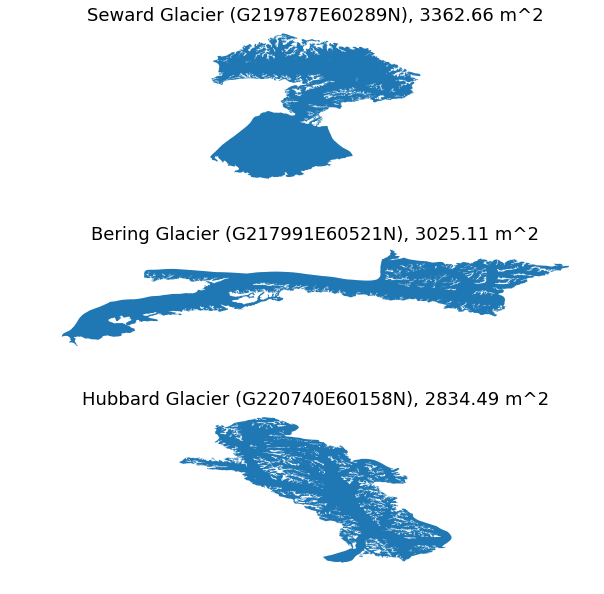

In [9]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r1_largest_pd_1.plot(ax=ax1)
ax1.set_title(r1_largest_name_1['glac_name'][0] + ' (' + r1_largest_name_1['glac_id']
              [0] + '), ' + str(r1_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r1_largest_pd_2.plot(ax=ax2)
ax2.set_title(r1_largest_name_2['glac_name'][1] + ' (' + r1_largest_name_2['glac_id']
              [1] + '), ' + str(r1_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r1_largest_pd_3.plot(ax=ax3)
ax3.set_title(r1_largest_name_3['glac_name'][2] + ' (' + r1_largest_name_3['glac_id']
              [2] + '), ' + str(r1_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 2 - Western Canada and USA

In [10]:
# Open GLIMS region 2
glims_region_2_fp = "data/glims/processed/cleaned/glims_region_2_cleaned.shp"
glims_polygons_r2 = gpd.read_file(glims_region_2_fp)

In [11]:
# Open GLIMS Region 2 csv file with 10 largest glaciers
glims_largest_r2 = ws.print_10_largest_glims(2)

GLIMS 10 Largest glaciers and their size for Region 2 - Western Canada and USA:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G234082E51540N             469.7660     Klinaklini Glacier  2004-07-22T00:00:00
      G234658E51318N             153.4270       Franklin Glacier  2004-07-22T00:00:00
      G235401E51143N             131.1120        Jewakwa Glacier  2004-08-09T00:00:00
      G236376E50799N              81.9767         Bridge Glacier  2004-08-09T00:00:00
      G233819E52013N              73.2519       Jacobsen Glacier  2004-07-22T00:00:00
      G236186E50856N              71.6418  Stanley Smith Glacier  2004-08-09T00:00:00
      G234015E51942N              66.3389       Talchako Glacier  2004-07-22T00:00:00
      G234818E51352N              58.9104      Tiedemann Glacier  2004-07-22T00:00:00
      G234015E51359N              57.6494                   None  2004-07-22T00:00:00
      G233836E51464N              56.8717       Pashleth Gl

In [12]:
# Open and print RGI Region 2 csv file with 10 largest glaciers
rgi_largest_r2 = ws.print_10_largest_rgi(2)

RGI 10 Largest glaciers and their size for Region 2 - Western Canada and USA:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G234050E51502N              469.766                  NaN             20049999
      G234663E51321N              153.427                  NaN             20049999
      G235390E51067N              136.850                  NaN             20049999
      G235376E51153N              131.112                  NaN             20049999
      G236361E50822N               81.977                  NaN             20049999
      G233852E52014N               73.252                  NaN             20049999
      G236187E50855N               71.642                  NaN             20049999
      G234038E51945N               66.339                  NaN             20049999
      G234864E51343N               58.910                  NaN             20049999
      G234034E51356N               57.649                  NaN             2004

In [13]:
# Select 3 largest from GLIMS Region 2
r2_largest_name_1 = glims_largest_r2.iloc[0:1]
r2_largest_pd_1 = glims_polygons_r2[glims_polygons_r2['glac_id']==r2_largest_name_1['glac_id'][0]]

r2_largest_name_2 = glims_largest_r2.iloc[1:2]
r2_largest_pd_2 = glims_polygons_r2[glims_polygons_r2['glac_id']==r2_largest_name_2['glac_id'][1]]

r2_largest_name_3 = glims_largest_r2.iloc[2:3]
r2_largest_pd_3 = glims_polygons_r2[glims_polygons_r2['glac_id']==r2_largest_name_3['glac_id'][2]]

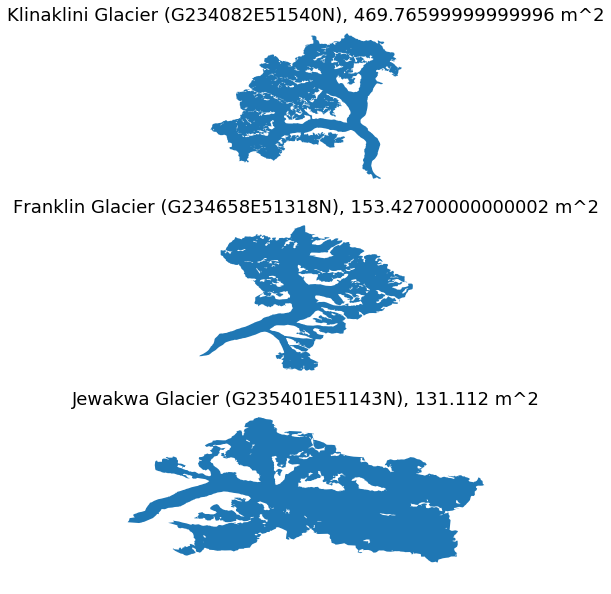

In [14]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r2_largest_pd_1.plot(ax=ax1)
ax1.set_title(r2_largest_name_1['glac_name'][0] + ' (' + r2_largest_name_1['glac_id']
              [0] + '), ' + str(r2_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r2_largest_pd_2.plot(ax=ax2)
ax2.set_title(r2_largest_name_2['glac_name'][1] + ' (' + r2_largest_name_2['glac_id']
              [1] + '), ' + str(r2_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r2_largest_pd_3.plot(ax=ax3)
ax3.set_title(r2_largest_name_3['glac_name'][2] + ' (' + r2_largest_name_3['glac_id']
              [2] + '), ' + str(r2_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 3 - Arctic Canada, North

In [15]:
# Open GLIMS region 3
glims_region_3_fp = "data/glims/processed/cleaned/glims_region_3_cleaned.shp"
glims_polygons_r3 = gpd.read_file(glims_region_3_fp)

In [16]:
# Open GLIMS Region 3 csv file with 10 largest glaciers
glims_largest_r3 = ws.print_10_largest_glims(3)

GLIMS 10 Largest glaciers and their size for Region 3 - Arctic Canada, North:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G280449E77998N              3266.43                 None  1999-07-09T00:00:00
      G278488E75058N              2622.81                 None  1999-06-15T00:00:00
      G276805E75127N              2170.55                 None  1999-06-15T00:00:00
      G280783E77677N              1891.12                 None  1999-07-09T00:00:00
      G274800E74935N              1780.65                 None  1999-06-15T00:00:00
      G279922E76831N              1746.58                 None  2002-07-19T17:58:00
      G284432E82157N              1734.50          M'Clintock,  1999-06-15T00:00:00
      G283470E80355N              1594.48                 None  1999-06-15T00:00:00
      G281841E78455N              1530.28                 None  1999-07-09T00:00:00
      G279351E78361N              1436.01                 None  1999-07-09T00:0

In [17]:
# Open and print RGI Region 3 csv file with 10 largest glaciers
rgi_largest_r3 = ws.print_10_largest_rgi(3)

RGI 10 Largest glaciers and their size for Region 3 - Arctic Canada, North:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G280449E77998N             3085.113             Wykeham Glacier South             19999999
      G278488E75058N             2622.813  Devon Ice Cap Southeast2 Glacier             19999999
      G276805E75127N             2170.549                               NaN             19999999
      G280783E77677N             1892.023               Easter Island South             19999999
      G274800E74935N             1780.453                               NaN             19999999
      G279922E76831N             1741.310                            Mittie             19999999
      G284432E82157N             1734.500                         MClintock             19999999
      G283470E80355N             1594.482                        DIberville             19999999
      G281841E78455N             1530.284                    

In [18]:
# Select 3 largest from GLIMS Region 3
r3_largest_name_1 = glims_largest_r3.iloc[0:1]
r3_largest_pd_1 = glims_polygons_r3[glims_polygons_r3['glac_id']==r3_largest_name_1['glac_id'][0]]

r3_largest_name_2 = glims_largest_r3.iloc[1:2]
r3_largest_pd_2 = glims_polygons_r3[glims_polygons_r3['glac_id']==r3_largest_name_2['glac_id'][1]]

r3_largest_name_3 = glims_largest_r3.iloc[2:3]
r3_largest_pd_3 = glims_polygons_r3[glims_polygons_r3['glac_id']==r3_largest_name_3['glac_id'][2]]

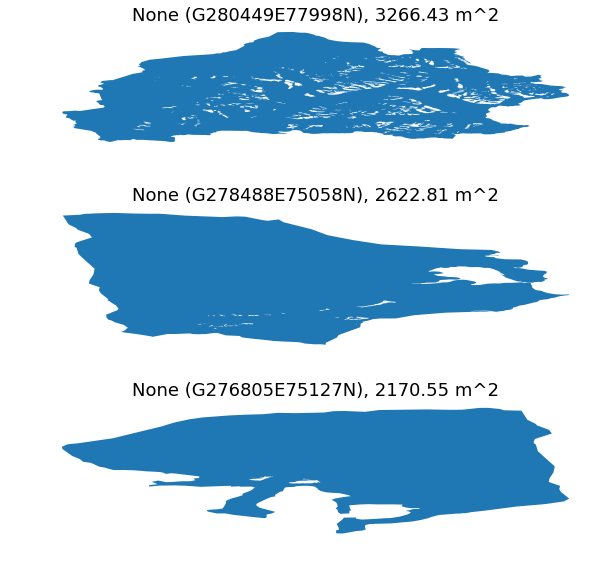

In [19]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r3_largest_pd_1.plot(ax=ax1)
ax1.set_title(r3_largest_name_1['glac_name'][0] + ' (' + r3_largest_name_1['glac_id']
              [0] + '), ' + str(r3_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r3_largest_pd_2.plot(ax=ax2)
ax2.set_title(r3_largest_name_2['glac_name'][1] + ' (' + r3_largest_name_2['glac_id']
              [1] + '), ' + str(r3_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r3_largest_pd_3.plot(ax=ax3)
ax3.set_title(r3_largest_name_3['glac_name'][2] + ' (' + r3_largest_name_3['glac_id']
              [2] + '), ' + str(r3_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 4 - Arctic Canada, South

In [20]:
# Open GLIMS region 4
glims_region_4_fp = "data/glims/processed/cleaned/glims_region_4_cleaned.shp"
glims_polygons_r4 = gpd.read_file(glims_region_4_fp)

In [21]:
# Open GLIMS Region 4 csv file with 10 largest glaciers
glims_largest_r4 = ws.print_10_largest_glims(4)

GLIMS 10 Largest glaciers and their size for Region 4 - Arctic Canada, South:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G286943E70021N             2771.410  Barnes Ice Cap South Dome N Slope,  2002-08-02T00:00:00
      G286791E69818N             1051.340                                None  2000-07-27T00:00:00
      G286036E69984N              959.865                                None  2000-07-27T00:00:00
      G293919E67124N              811.875                                None  2000-08-15T00:00:00
      G294647E67092N              661.739                                None  2000-08-13T00:00:00
      G285584E70223N              585.292                                None  2002-08-02T00:00:00
      G281633E73315N              576.155                                None  2001-08-09T00:00:00
      G294456E67304N              468.392                                None  2000-08-13T00:00:00
      G284216E72339N              420.095  

In [22]:
# Open and print RGI Region 4 csv file with 10 largest glaciers
rgi_largest_r4 = ws.print_10_largest_rgi(4)

RGI 10 Largest glaciers and their size for Region 4 - Arctic Canada, South:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G286943E70021N             2771.412  Barnes Ice Cap South Dome N Slope             20020802
      G286791E69818N             1051.343            Barnes Ice Cap Loeken 2             20000727
      G286036E69984N              959.865                                NaN             20000727
      G293919E67124N              811.874                                NaN             20000899
      G294647E67092N              661.740                                NaN             20000813
      G285584E70223N              585.292                                NaN             20020802
      G281633E73315N              576.156                                NaN             20010809
      G294456E67304N              468.392                                NaN             20000813
      G284216E72339N              420.095            

In [23]:
# Select 3 largest from GLIMS Region 4
r4_largest_name_1 = glims_largest_r4.iloc[0:1]
r4_largest_pd_1 = glims_polygons_r4[glims_polygons_r4['glac_id']==r4_largest_name_1['glac_id'][0]]

r4_largest_name_2 = glims_largest_r4.iloc[1:2]
r4_largest_pd_2 = glims_polygons_r4[glims_polygons_r4['glac_id']==r4_largest_name_2['glac_id'][1]]

r4_largest_name_3 = glims_largest_r4.iloc[2:3]
r4_largest_pd_3 = glims_polygons_r4[glims_polygons_r4['glac_id']==r4_largest_name_3['glac_id'][2]]

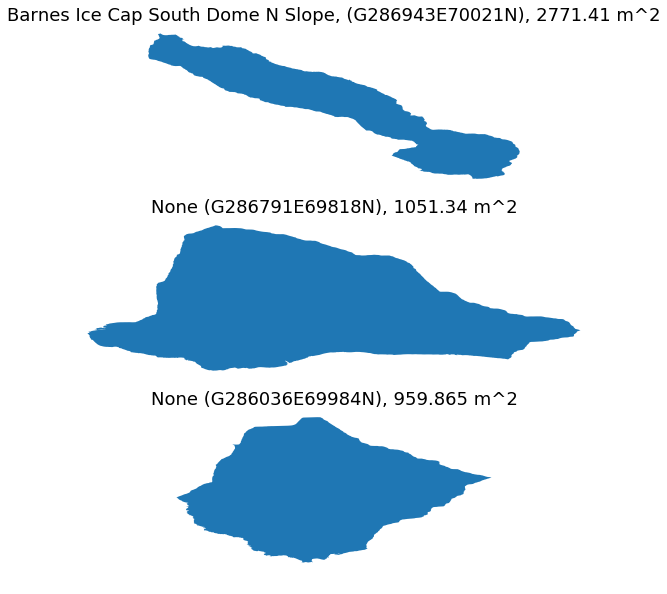

In [24]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r4_largest_pd_1.plot(ax=ax1)
ax1.set_title(r4_largest_name_1['glac_name'][0] + ' (' + r4_largest_name_1['glac_id']
              [0] + '), ' + str(r4_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r4_largest_pd_2.plot(ax=ax2)
ax2.set_title(r4_largest_name_2['glac_name'][1] + ' (' + r4_largest_name_2['glac_id']
              [1] + '), ' + str(r4_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r4_largest_pd_3.plot(ax=ax3)
ax3.set_title(r4_largest_name_3['glac_name'][2] + ' (' + r4_largest_name_3['glac_id']
              [2] + '), ' + str(r4_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 5 - Greenland Periphery

In [25]:
# Open GLIMS region 5
glims_region_5_fp = "data/glims/processed/cleaned/glims_region_5_cleaned.shp"
glims_polygons_r5 = gpd.read_file(glims_region_5_fp)

In [26]:
# Open GLIMS Region 5 csv file with 10 largest glaciers
glims_largest_r5 = ws.print_10_largest_glims(5)

GLIMS 10 Largest glaciers and their size for Region 5 - Greenland Periphery:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G344790E81287N              7537.75                 None  2003-07-01T00:00:00
      G329763E69208N              5793.78     CHRISTIAN IV GL.  1995-12-16T00:00:00
      G329389E69966N              5169.31        VESTFJORD GL.  1995-12-16T00:00:00
      G333975E69553N              4241.04                 None  2000-08-28T00:00:00
      G332658E69567N              3682.25                 None  2000-08-28T00:00:00
      G330976E68786N              2979.31                 None  1999-08-01T00:00:00
      G331685E69750N              2430.62                 None  2001-09-21T00:00:00
      G330143E70706N              2429.39           ROLIGE BR  1995-12-16T00:00:00
      G331717E69556N              2414.99                 None  1995-12-16T00:00:00
      G331157E69166N              2262.67                 None  1999-08-01T00:00

In [27]:
# Open and print RGI Region 5 csv file with 10 largest glaciers
rgi_largest_r5 = ws.print_10_largest_rgi(5)

RGI 10 Largest glaciers and their size for Region 5 - Greenland Periphery:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G344790E81287N             7537.579                  NaN             20010703
      G333975E69553N             4239.826     Dendritgletscher             20000828
      G332658E69567N             3679.009                  NaN             20010712
      G330976E68786N             2975.915                  NaN             19990811
      G331685E69750N             2428.633                  NaN             20010921
      G331157E69166N             2219.510           Borggraven             19990811
      G332759E68980N             1235.267            Sortebrae             19990811
      G334864E70010N             1225.471                  NaN             20000828
      G327559E68005N             1146.469                  NaN             20020814
      G335358E69815N             1024.530                  NaN             2000082

In [28]:
# Select 3 largest from GLIMS Region 5
r5_largest_name_1 = glims_largest_r5.iloc[0:1]
r5_largest_pd_1 = glims_polygons_r5[glims_polygons_r5['glac_id']==r5_largest_name_1['glac_id'][0]]

r5_largest_name_2 = glims_largest_r5.iloc[1:2]
r5_largest_pd_2 = glims_polygons_r5[glims_polygons_r5['glac_id']==r5_largest_name_2['glac_id'][1]]

r5_largest_name_3 = glims_largest_r5.iloc[2:3]
r5_largest_pd_3 = glims_polygons_r5[glims_polygons_r5['glac_id']==r5_largest_name_3['glac_id'][2]]

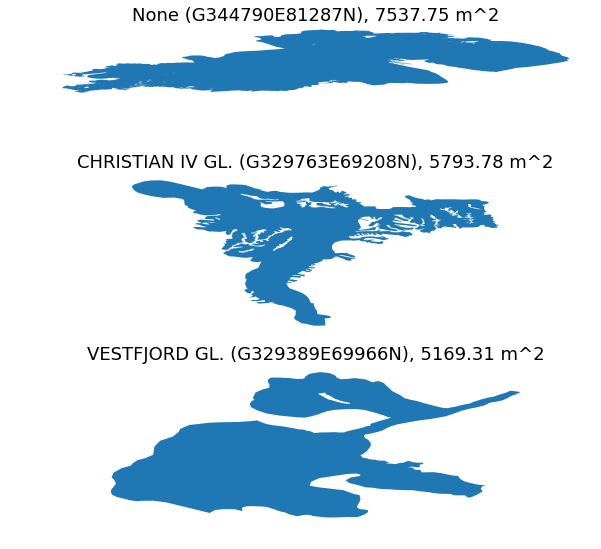

In [29]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r5_largest_pd_1.plot(ax=ax1)
ax1.set_title(r5_largest_name_1['glac_name'][0] + ' (' + r5_largest_name_1['glac_id']
              [0] + '), ' + str(r5_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r5_largest_pd_2.plot(ax=ax2)
ax2.set_title(r5_largest_name_2['glac_name'][1] + ' (' + r5_largest_name_2['glac_id']
              [1] + '), ' + str(r5_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r5_largest_pd_3.plot(ax=ax3)
ax3.set_title(r5_largest_name_3['glac_name'][2] + ' (' + r5_largest_name_3['glac_id']
              [2] + '), ' + str(r5_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 6 - Iceland

In [30]:
# Open GLIMS region 6
glims_region_6_fp = "data/glims/processed/cleaned/glims_region_6_cleaned.shp"
glims_polygons_r6 = gpd.read_file(glims_region_6_fp)

In [31]:
# Open GLIMS Region 6 csv file with 10 largest glaciers
glims_largest_r6 = ws.print_10_largest_glims(6)

GLIMS 10 Largest glaciers and their size for Region 6 - Iceland:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G343222E64409N            8091.6700          Vatnajokull  1999-01-01T00:00:00
      G339764E64629N             920.5870           Langjokull  2000-08-20T00:00:00
      G341164E64838N             889.5340           Hofsjokull  1999-08-01T00:00:00
      G340925E63656N             596.6160        Myrdalsjokull  1999-08-01T00:00:00
      G337738E66173N             145.9330         Drangajokull  2004-08-16T00:00:00
      G340399E63622N              79.7979     Eyjafjallajokull  2001-09-08T00:00:00
      G342097E64755N              38.4369    Tungnafellsjokull  2000-01-01T00:00:00
      G339290E64537N              29.5141           Irisjokull  2000-08-20T00:00:00
      G345090E64698N              17.0460        Irandarjokull  1999-01-01T00:00:00
      G341157E65666N              11.8676                 None  2000-08-01T00:00:00


In [32]:
# Open and print RGI Region 6 csv file with 10 largest glaciers
rgi_largest_r6 = ws.print_10_largest_rgi(6)

RGI 10 Largest glaciers and their size for Region 6 - Iceland:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G342858E64298N             1561.218                 Skeidararjoekull             20009999
      G343733E64587N             1428.724                     Bruarjoekull             20009999
      G343523E64267N             1067.745              Breidamerkurjoekull             20009999
      G342946E64674N             1060.639                    Dyngjujoekull             20009999
      G342298E64282N              757.308       Sidujoekull/Skaftarjoekull             20009999
      G342283E64563N              319.463             Koeldukvislarjoekull             20009999
      G342073E64348N              271.069                  Tungnaarjoekull             20009999
      G341358E64799N              264.536  Thjorsarjoekull (Hofsjoekull E)             19999999
      G344344E64519N              240.050                              NaN        

In [33]:
# Select 3 largest from GLIMS Region 6
r6_largest_name_1 = glims_largest_r6.iloc[0:1]
r6_largest_pd_1 = glims_polygons_r6[glims_polygons_r6['glac_id']==r6_largest_name_1['glac_id'][0]]

r6_largest_name_2 = glims_largest_r6.iloc[1:2]
r6_largest_pd_2 = glims_polygons_r6[glims_polygons_r6['glac_id']==r6_largest_name_2['glac_id'][1]]

r6_largest_name_3 = glims_largest_r6.iloc[2:3]
r6_largest_pd_3 = glims_polygons_r6[glims_polygons_r6['glac_id']==r6_largest_name_3['glac_id'][2]]

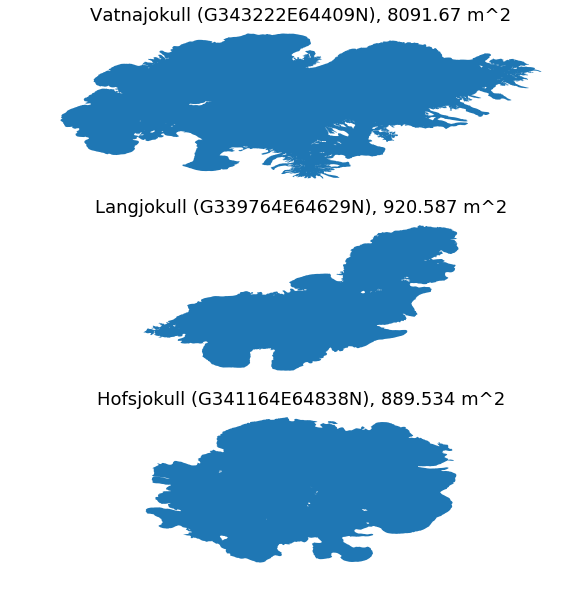

In [34]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r6_largest_pd_1.plot(ax=ax1)
ax1.set_title(r6_largest_name_1['glac_name'][0] + ' (' + r6_largest_name_1['glac_id']
              [0] + '), ' + str(r6_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r6_largest_pd_2.plot(ax=ax2)
ax2.set_title(r6_largest_name_2['glac_name'][1] + ' (' + r6_largest_name_2['glac_id']
              [1] + '), ' + str(r6_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r6_largest_pd_3.plot(ax=ax3)
ax3.set_title(r6_largest_name_3['glac_name'][2] + ' (' + r6_largest_name_3['glac_id']
              [2] + '), ' + str(r6_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 7 - Svalbard and Jan Mayen

In [35]:
# Open GLIMS region 7
glims_region_7_fp = "data/glims/processed/cleaned/glims_region_7_cleaned.shp"
glims_polygons_r7 = gpd.read_file(glims_region_7_fp)

In [36]:
# Open GLIMS Region 7 csv file with 10 largest glaciers
glims_largest_r7 = ws.print_10_largest_glims(7)

GLIMS 10 Largest glaciers and their size for Region 7 - Svalbard and Jan Mayen:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G024340E79634N             1226.390              Austfonna, -  2001-07-10T00:00:00
      G023559E79453N             1095.860  Austfonna, Bråsvellbreen  2001-07-10T00:00:00
      G018042E78675N              963.858                Negribreen  2008-09-01T00:00:00
      G018391E78924N              876.603             Hinlopenbreen  2002-07-13T00:00:00
      G025747E79959N              692.697     Austfonna, Leighbreen  2008-08-14T00:00:00
      G025297E79771N              662.930              Austfonna, -  2001-07-10T00:00:00
      G032778E80246N              646.421             Kvitøyjøkulen  2007-07-15T00:00:00
      G022972E79705N              641.025      Austfonna, Etonbreen  2008-08-14T00:00:00
      G019758E78902N              594.903          Hockstatterbreen  2004-07-13T00:00:00
      G023608E77828N            

In [37]:
# Open and print RGI Region 7 csv file with 10 largest glaciers
rgi_largest_r7 = ws.print_10_largest_rgi(7)

RGI 10 Largest glaciers and their size for Region 7 - Svalbard and Jan Mayen:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G024554E79593N             1226.367     Austfonna basin 3             20010710
      G023512E79401N             1095.853        Braasvellbreen             20010710
      G018474E78680N              963.857            Negribreen             20080901
      G018349E78926N              876.603         Hinlopenbreen             20020713
      G026018E80013N              692.661  Austfonna Leighbreen             20080814
      G025601E79742N              662.905             Austfonna             20010710
      G032471E80184N              645.801         Kvitøyjøkulen             20070715
      G022842E79688N              641.022  Etonbreen: Austfonna             20080814
      G019824E78864N              594.902      Hochstetterbreen             20040713
      G023718E77811N              581.764            Stonebreen       

In [38]:
# Select 3 largest from GLIMS Region 7
r7_largest_name_1 = glims_largest_r7.iloc[0:1]
r7_largest_pd_1 = glims_polygons_r7[glims_polygons_r7['glac_id']==r7_largest_name_1['glac_id'][0]]

r7_largest_name_2 = glims_largest_r7.iloc[1:2]
r7_largest_pd_2 = glims_polygons_r7[glims_polygons_r7['glac_id']==r7_largest_name_2['glac_id'][1]]

r7_largest_name_3 = glims_largest_r7.iloc[2:3]
r7_largest_pd_3 = glims_polygons_r7[glims_polygons_r7['glac_id']==r7_largest_name_3['glac_id'][2]]

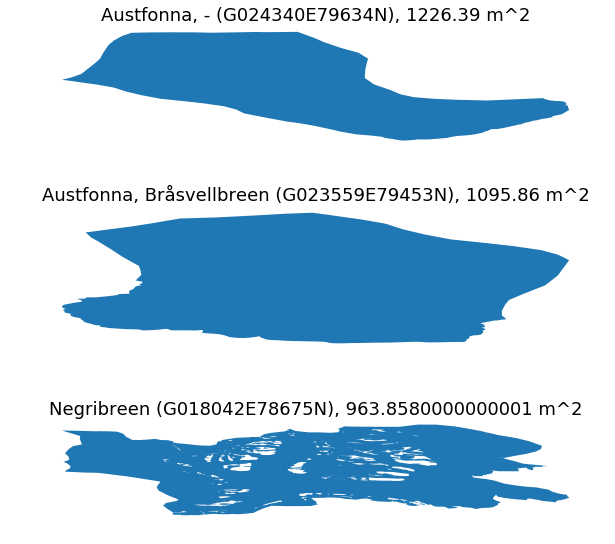

In [39]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r7_largest_pd_1.plot(ax=ax1)
ax1.set_title(r7_largest_name_1['glac_name'][0] + ' (' + r7_largest_name_1['glac_id']
              [0] + '), ' + str(r7_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r7_largest_pd_2.plot(ax=ax2)
ax2.set_title(r7_largest_name_2['glac_name'][1] + ' (' + r7_largest_name_2['glac_id']
              [1] + '), ' + str(r7_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r7_largest_pd_3.plot(ax=ax3)
ax3.set_title(r7_largest_name_3['glac_name'][2] + ' (' + r7_largest_name_3['glac_id']
              [2] + '), ' + str(r7_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 8 - Scandinavia

In [40]:
# Open GLIMS region 8
glims_region_8_fp = "data/glims/processed/cleaned/glims_region_8_cleaned.shp"
glims_polygons_r8 = gpd.read_file(glims_region_8_fp)

In [41]:
# Open GLIMS Region 8 csv file with 10 largest glaciers
glims_largest_r8 = ws.print_10_largest_glims(8)

GLIMS 10 Largest glaciers and their size for Region 8 - Scandinavia:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G014136E66566N              55.4478       Austerdalsisen  1999-09-07T00:00:00
      G006998E61646N              47.4723    Tunsbergdalsbreen  2006-09-16T00:00:00
      G007099E61715N              41.8721         Nigardsbreen  2006-09-16T00:00:00
      G013994E66685N              41.2352   Storglombreen nord  1999-09-07T00:00:00
      G013853E66657N              36.0486            Engabreen  1999-09-07T00:00:00
      G006362E59989N              22.9996  Blomstølskardsbreen  2002-09-13T00:00:00
      G006320E59995N              22.5970         Svelgjabreen  2002-09-13T00:00:00
      G014288E66622N              20.9137          Fingerbreen  1999-09-07T00:00:00
      G016130E67269N              20.3647                 None  1999-09-07T00:00:00
      G007202E61739N              20.2261     Fåbergstølsbreen  2006-09-16T00:00:00


In [42]:
# Open and print RGI Region 8 csv file with 10 largest glaciers
rgi_largest_r8 = ws.print_10_largest_rgi(8)

RGI 10 Largest glaciers and their size for Region 8 - Scandinavia:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G014136E66566N               55.448        Austerdalsisen             19990907
      G006998E61646N               47.472     Tunsbergdalsbreen             20060916
      G007099E61715N               41.872          Nigardsbreen             20060916
      G013994E66685N               41.235       Storglombreen N             19990907
      G013853E66657N               36.049             Engabreen             19990907
      G006362E59989N               23.000  Blomstoelskardsbreen             20020913
      G006320E59995N               22.597          Svelgjabreen             20020913
      G016345E67139N               21.469             Salajekna             19990907
      G014288E66622N               20.914           Fingerbreen             19990907
      G016130E67269N               20.365                   NaN             19990

In [43]:
# Select 3 largest from GLIMS Region 8
r8_largest_name_1 = glims_largest_r8.iloc[0:1]
r8_largest_pd_1 = glims_polygons_r8[glims_polygons_r8['glac_id']==r8_largest_name_1['glac_id'][0]]

r8_largest_name_2 = glims_largest_r8.iloc[1:2]
r8_largest_pd_2 = glims_polygons_r8[glims_polygons_r8['glac_id']==r8_largest_name_2['glac_id'][1]]

r8_largest_name_3 = glims_largest_r8.iloc[2:3]
r8_largest_pd_3 = glims_polygons_r8[glims_polygons_r8['glac_id']==r8_largest_name_3['glac_id'][2]]

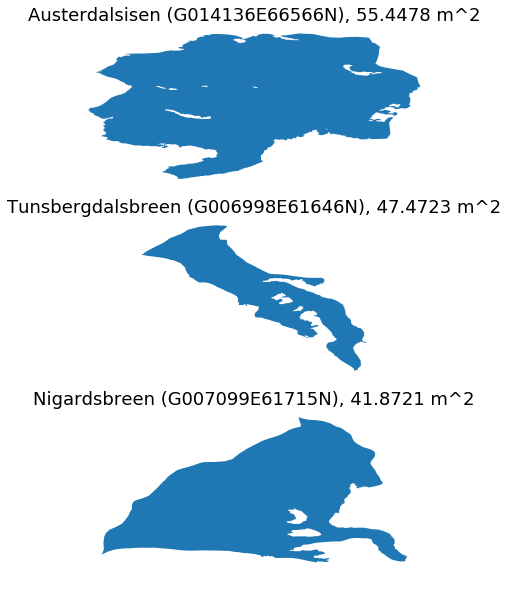

In [44]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r8_largest_pd_1.plot(ax=ax1)
ax1.set_title(r8_largest_name_1['glac_name'][0] + ' (' + r8_largest_name_1['glac_id']
              [0] + '), ' + str(r8_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r8_largest_pd_2.plot(ax=ax2)
ax2.set_title(r8_largest_name_2['glac_name'][1] + ' (' + r8_largest_name_2['glac_id']
              [1] + '), ' + str(r8_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r8_largest_pd_3.plot(ax=ax3)
ax3.set_title(r8_largest_name_3['glac_name'][2] + ' (' + r8_largest_name_3['glac_id']
              [2] + '), ' + str(r8_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 9 - Russian Arctic

In [45]:
# Open GLIMS region 9
glims_region_9_fp = "data/glims/processed/cleaned/glims_region_9_cleaned.shp"
glims_polygons_r9 = gpd.read_file(glims_region_9_fp)

In [46]:
# Open GLIMS Region 9 csv file with 10 largest glaciers
glims_largest_r9 = ws.print_10_largest_glims(9)

GLIMS 10 Largest glaciers and their size for Region 9 - Russian Arctic:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G062382E75725N             1256.770           Severny Island Ice Cap (Severny Island)  2013-08-19T00:00:00
      G094346E80731N             1243.500  Academy of Sciences Ice Cap (Komsomolets Island)  2006-07-13T00:00:00
      G093532E80531N             1032.800  Academy of Sciences Ice Cap (Komsomolets Island)  2006-07-13T00:00:00
      G059699E75391N              908.349           Severny Island Ice Cap (Severny Island)  2013-08-03T00:00:00
      G063849E75923N              841.507           Severny Island Ice Cap (Severny Island)  2013-08-19T00:00:00
      G096063E80433N              829.409  Academy of Sciences Ice Cap (Komsomolets Island)  2006-07-13T00:00:00
      G066985E76524N              826.802           Severny Island Ice Cap (Severny Island)  2013-08-19T00:00:00
      G058922E75263N              713.029         

In [47]:
# Open and print RGI Region 9 csv file with 10 largest glaciers
rgi_largest_r9 = ws.print_10_largest_rgi(9)

RGI 10 Largest glaciers and their size for Region 9 - Russian Arctic:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G060168E75349N             1412.730                                     Vylki + Shury             20000812
      G095292E80735N             1243.510  Academy of Sciences Ice Cap (Komsomolets Island)             20020605
      G093532E80531N             1032.805  Academy of Sciences Ice Cap (Komsomolets Island)             20020605
      G062380E75725N              957.197                                         Moshchnyy             20000812
      G096002E80452N              829.413  Academy of Sciences Ice Cap (Komsomolets Island)             20020605
      G058641E75298N              757.677                                      Nordenskiold             20000812
      G093799E80306N              707.191  Academy of Sciences Ice Cap (Komsomolets Island)             20020605
      G066531E76464N              669.472           

In [48]:
# Select 3 largest from GLIMS Region 9
r9_largest_name_1 = glims_largest_r9.iloc[0:1]
r9_largest_pd_1 = glims_polygons_r9[glims_polygons_r9['glac_id']==r9_largest_name_1['glac_id'][0]]

r9_largest_name_2 = glims_largest_r9.iloc[1:2]
r9_largest_pd_2 = glims_polygons_r9[glims_polygons_r9['glac_id']==r9_largest_name_2['glac_id'][1]]

r9_largest_name_3 = glims_largest_r9.iloc[2:3]
r9_largest_pd_3 = glims_polygons_r9[glims_polygons_r9['glac_id']==r9_largest_name_3['glac_id'][2]]

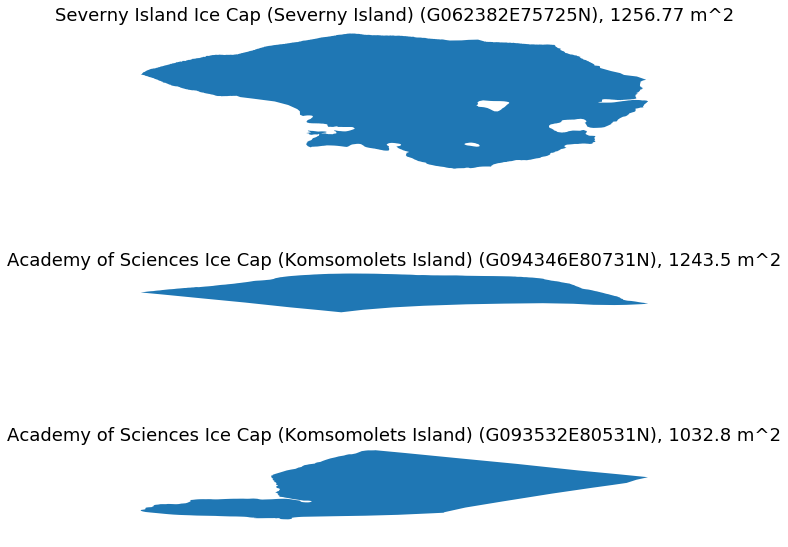

In [49]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r9_largest_pd_1.plot(ax=ax1)
ax1.set_title(r9_largest_name_1['glac_name'][0] + ' (' + r9_largest_name_1['glac_id']
              [0] + '), ' + str(r9_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r9_largest_pd_2.plot(ax=ax2)
ax2.set_title(r9_largest_name_2['glac_name'][1] + ' (' + r9_largest_name_2['glac_id']
              [1] + '), ' + str(r9_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r9_largest_pd_3.plot(ax=ax3)
ax3.set_title(r9_largest_name_3['glac_name'][2] + ' (' + r9_largest_name_3['glac_id']
              [2] + '), ' + str(r9_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 10 - Asia, North

In [50]:
# Open GLIMS region 10
glims_region_10_fp = "data/glims/processed/cleaned/glims_region_10_cleaned.shp"
glims_polygons_r10 = gpd.read_file(glims_region_10_fp)

In [51]:
# Open GLIMS Region 10 csv file with 10 largest glaciers
glims_largest_r10 = ws.print_10_largest_glims(10)

GLIMS 10 Largest glaciers and their size for Region 10 - Asia, North:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G148920E76680N              48.1442  SU5E17701002 Toll Ice Cap                      ?  1956-05-15T00:00:00
      G087851E49154N              37.3957                                              None  2011-08-23T00:00:00
      G160564E57830N              33.7142                                              None  2011-08-03T00:00:00
      G160561E56087N              33.4809                                              None  2011-08-03T00:00:00
      G087783E49100N              23.9553                                    Kanasi Glacier  2011-08-23T00:00:00
      G160534E56058N              23.6070                                              None  2011-08-03T00:00:00
      G160939E58220N              18.0644                                              None  2000-07-18T00:00:00
      G160474E56097N              17.9475           

In [52]:
# Open and print RGI Region 10 csv file with 10 largest glaciers
rgi_largest_r10 = ws.print_10_largest_rgi(10)

RGI 10 Largest glaciers and their size for Region 10 - Asia, North:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G148920E76680N               48.144  SU5E17701002 Toll Ice Cap             19560599
      G087857E49157N               37.323                        NaN             20110823
      G160564E57830N               33.714                        NaN             20110803
      G160561E56087N               33.481                        NaN             20110803
      G087840E49109N               23.955                        NaN             20110823
      G160534E56058N               23.607                        NaN             20110803
      G160939E58220N               18.064                        NaN             20000718
      G160474E56097N               17.947                  Bilchenok             20110803
      G160647E57920N               17.177                        NaN             20110803
      G160762E58040N               

In [53]:
# Select 3 largest from GLIMS Region 10
r10_largest_name_1 = glims_largest_r10.iloc[0:1]
r10_largest_pd_1 = glims_polygons_r10[glims_polygons_r10['glac_id']==r10_largest_name_1['glac_id'][0]]

r10_largest_name_2 = glims_largest_r10.iloc[1:2]
r10_largest_pd_2 = glims_polygons_r10[glims_polygons_r10['glac_id']==r10_largest_name_2['glac_id'][1]]

r10_largest_name_3 = glims_largest_r10.iloc[2:3]
r10_largest_pd_3 = glims_polygons_r10[glims_polygons_r10['glac_id']==r10_largest_name_3['glac_id'][2]]

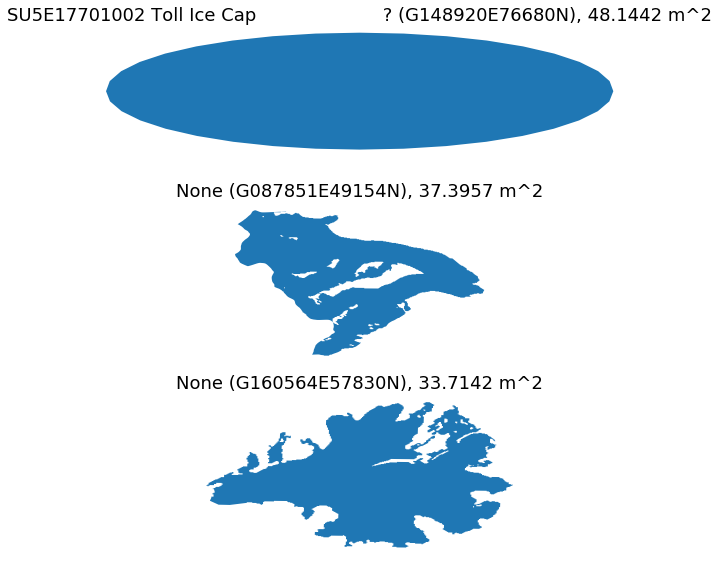

In [54]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r10_largest_pd_1.plot(ax=ax1)
ax1.set_title(r10_largest_name_1['glac_name'][0] + ' (' + r10_largest_name_1['glac_id']
              [0] + '), ' + str(r10_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r10_largest_pd_2.plot(ax=ax2)
ax2.set_title(r10_largest_name_2['glac_name'][1] + ' (' + r10_largest_name_2['glac_id']
              [1] + '), ' + str(r10_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r10_largest_pd_3.plot(ax=ax3)
ax3.set_title(r10_largest_name_3['glac_name'][2] + ' (' + r10_largest_name_3['glac_id']
              [2] + '), ' + str(r10_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 11 - Central Europe

In [55]:
# Open GLIMS region 11
glims_region_11_fp = "data/glims/processed/cleaned/glims_region_11_cleaned.shp"
glims_polygons_r11 = gpd.read_file(glims_region_11_fp)

In [56]:
# Open GLIMS Region 11 csv file with 10 largest glaciers
glims_largest_r11 = ws.print_10_largest_glims(11)

GLIMS 10 Largest glaciers and their size for Region 11 - Central Europe:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G008032E46504N              78.3518  GROSSER ALETSCH GLETSCHER  2009-09-15T00:00:00
      G007800E45965N              40.2306            GORNERGLETSCHER  2009-09-15T00:00:00
      G008144E46504N              29.4750       FIESCHERGLETSCHER VS  2009-09-15T00:00:00
      G008187E46569N              22.5060          UNTERAARGLETSCHER  2009-09-15T00:00:00
      G007964E46423N              17.4801      OBERALETSCH GLETSCHER  2009-09-15T00:00:00
      G007964E46423N              17.4801      OBERALETSCH GLETSCHER  2009-09-15T00:00:00
      G012678E47096N              16.5807             Pasterzen Kees  2016-08-27T00:00:00
      G010535E46167N              15.7613                   Adamello  2011-09-30T00:00:00
      G010748E46850N              15.6322            Gepatsch Ferner  2015-08-26T00:00:00
      G007297E45961N          

In [57]:
# Open and print RGI Region 11 csv file with 10 largest glaciers
rgi_largest_r11 = ws.print_10_largest_rgi(11)

RGI 10 Largest glaciers and their size for Region 11 - Central Europe:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G008019E46503N               82.206                              NaN             20030799
      G007803E45950N               56.464                              NaN             20030799
      G008121E46517N               31.334                              NaN             20030799
      G006934E45883N               24.179  FR4N01236A01 Mer de Glace/Geant             20030813
      G008219E46564N               23.825                              NaN             20030799
      G007977E46417N               19.286                              NaN             20030799
      G008067E46568N               18.842                              NaN             20030799
      G012697E47099N               17.774                         Pasterze             20030799
      G007291E45965N               16.697                              NaN

In [58]:
# Select 3 largest from GLIMS Region 11
r11_largest_name_1 = glims_largest_r11.iloc[0:1]
r11_largest_pd_1 = glims_polygons_r11[glims_polygons_r11['glac_id']==r11_largest_name_1['glac_id'][0]]

r11_largest_name_2 = glims_largest_r11.iloc[1:2]
r11_largest_pd_2 = glims_polygons_r11[glims_polygons_r11['glac_id']==r11_largest_name_2['glac_id'][1]]

r11_largest_name_3 = glims_largest_r11.iloc[2:3]
r11_largest_pd_3 = glims_polygons_r11[glims_polygons_r11['glac_id']==r11_largest_name_3['glac_id'][2]]

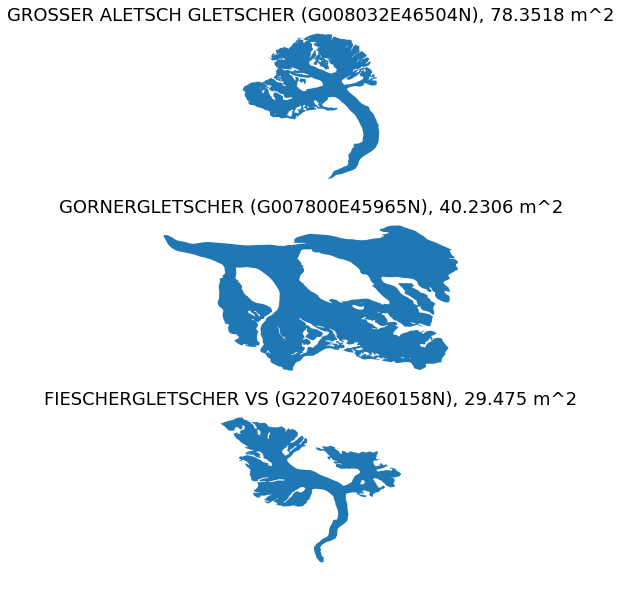

In [59]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r11_largest_pd_1.plot(ax=ax1)
ax1.set_title(r11_largest_name_1['glac_name'][0] + ' (' + r11_largest_name_1['glac_id']
              [0] + '), ' + str(r11_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r11_largest_pd_2.plot(ax=ax2)
ax2.set_title(r11_largest_name_2['glac_name'][1] + ' (' + r11_largest_name_2['glac_id']
              [1] + '), ' + str(r11_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r11_largest_pd_3.plot(ax=ax3)
ax3.set_title(r11_largest_name_3['glac_name'][2] + ' (' + r1_largest_name_3['glac_id']
              [2] + '), ' + str(r11_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 12 - Caucasus and Middle East

In [60]:
# Open GLIMS region 12
glims_region_12_fp = "data/glims/processed/cleaned/glims_region_12_cleaned.shp"
glims_polygons_r12 = gpd.read_file(glims_region_12_fp)

In [61]:
# Open GLIMS Region 12 csv file with 10 largest glaciers
glims_largest_r12 = ws.print_10_largest_glims(12)

GLIMS 10 Largest glaciers and their size for Region 12 - Caucasus and Middle East:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G043100E43030N              37.4991           Ulluchirak  2014-08-03T07:49:37
      G043183E42984N              27.5420   Dikh-kotiu-bugoisy  2014-08-03T07:49:37
      G043748E42782N              24.0045             Karaugom  2014-08-03T07:49:37
      G042766E43151N              23.7695             Lekhziri  2014-08-03T07:49:37
      G042506E43356N              21.4354          Kinchiroirt  2014-08-03T07:49:37
      G043291E42928N              18.9453             Agashtan  2014-08-03T07:49:37
      G042429E43293N              17.7178         Azay Bolshoy  2014-08-03T07:49:37
      G042432E43372N              12.7826           Ulluchiran  2014-08-03T07:49:37
      G043165E43066N              12.7395             Midjirgi  2014-08-03T07:49:37
      G042999E43050N              12.3201              Tsaneri  2014-08-03

In [62]:
# Open and print RGI Region 12 csv file with 10 largest glaciers
rgi_largest_r12 = ws.print_10_largest_rgi(12)

RGI 10 Largest glaciers and their size for Region 12 - Caucasus and Middle East:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G042748E43156N               31.076                  SU5T09105247             20010915
      G043084E43033N               29.959  SU4G08007001 Bezengi Glacier             20010915
      G043751E42785N               26.233                  SU4G08008049             19990818
      G042519E43359N               20.975                  SU4G08005006             20000912
      G042422E43310N               15.917                  Bolshoy Azau             20000912
      G043142E42981N               15.848                  SU4G08007085             20040815
      G043279E42930N               14.541                  SU4G08007107             20040815
      G042994E43055N               14.226                  SU5T09105275             20010915
      G042428E43378N               12.843                    Ulluchiran             2000

In [63]:
# Select 3 largest from GLIMS Region 12
r12_largest_name_1 = glims_largest_r12.iloc[0:1]
r12_largest_pd_1 = glims_polygons_r12[glims_polygons_r12['glac_id']==r12_largest_name_1['glac_id'][0]]

r12_largest_name_2 = glims_largest_r12.iloc[1:2]
r12_largest_pd_2 = glims_polygons_r12[glims_polygons_r12['glac_id']==r12_largest_name_2['glac_id'][1]]

r12_largest_name_3 = glims_largest_r12.iloc[2:3]
r12_largest_pd_3 = glims_polygons_r12[glims_polygons_r12['glac_id']==r12_largest_name_3['glac_id'][2]]

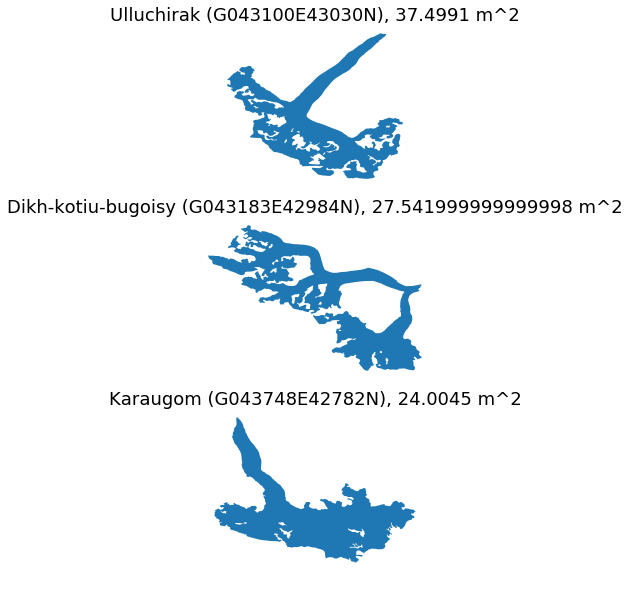

In [64]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r12_largest_pd_1.plot(ax=ax1)
ax1.set_title(r12_largest_name_1['glac_name'][0] + ' (' + r12_largest_name_1['glac_id']
              [0] + '), ' + str(r12_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r12_largest_pd_2.plot(ax=ax2)
ax2.set_title(r12_largest_name_2['glac_name'][1] + ' (' + r12_largest_name_2['glac_id']
              [1] + '), ' + str(r12_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r12_largest_pd_3.plot(ax=ax3)
ax3.set_title(r12_largest_name_3['glac_name'][2] + ' (' + r12_largest_name_3['glac_id']
              [2] + '), ' + str(r12_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 13 - Asia, Central

In [65]:
# Open GLIMS region 13
glims_region_13_fp = "data/glims/processed/cleaned/glims_region_13_cleaned.shp"
glims_polygons_r13 = gpd.read_file(glims_region_13_fp)

In [66]:
# Open GLIMS Region 13 csv file with 10 largest glaciers
glims_largest_r13 = ws.print_10_largest_glims(13)

GLIMS 10 Largest glaciers and their size for Region 13 - Asia, Central:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G079959E42153N              362.152                              None  2002-10-05T05:39:52
      G079990E41931N              358.247      CN5Y673P0037 Tuomuer Glacier  2007-08-24T00:00:00
      G079990E41931N              358.247      CN5Y673P0037 Tuomuer Glacier  2007-08-24T00:00:00
      G080334E42156N              282.720  CN5Y681B0016 Tugebieliqi Glacier  2007-08-24T00:00:00
      G080334E42156N              282.720  CN5Y681B0016 Tugebieliqi Glacier  2007-08-24T00:00:00
      G080879E35302N              237.458    CN5Z433D0008 Zhongfeng Glacier  2010-12-08T00:00:00
      G080879E35302N              237.458    CN5Z433D0008 Zhongfeng Glacier  2010-12-08T00:00:00
      G080951E35415N              236.769      CN5Y641G0023 Duofeng Glacier  2010-12-08T00:00:00
      G080951E35415N              236.769      CN5Y641G0023 Duofe

In [67]:
# Open and print RGI Region 13 csv file with 10 largest glaciers
rgi_largest_r13 = ws.print_10_largest_rgi(13)

RGI 10 Largest glaciers and their size for Region 13 - Asia, Central:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G072234E38780N              663.729           SU5X14308A001 Fedchenko             20000916
      G080193E42063N              373.922                               NaN             20020818
      G079990E41931N              358.247      CN5Y673P0037 Tuomuer Glacier             20070824
      G080334E42156N              282.721  CN5Y681B0016 Tugebieliqi Glacier             20070824
      G080879E35302N              237.458    CN5Z433D0008 Zhongfeng Glacier             20101208
      G080951E35415N              236.769      CN5Y641G0023 Duofeng Glacier             20101208
      G080728E35377N              199.088       CN5Y641G0055 Kunlun Glacier             20101208
      G080341E42280N              167.837       CN5Y681C0010 Wukuer Glacier             20070824
      G081099E35317N              166.078      CN5Z431C0001 Chongce

In [68]:
# Select 3 largest from GLIMS Region 13
r13_largest_name_1 = glims_largest_r13.iloc[0:1]
r13_largest_pd_1 = glims_polygons_r13[glims_polygons_r13['glac_id']==r13_largest_name_1['glac_id'][0]]

r13_largest_name_2 = glims_largest_r13.iloc[1:2]
r13_largest_pd_2 = glims_polygons_r13[glims_polygons_r13['glac_id']==r13_largest_name_2['glac_id'][1]]

r13_largest_name_3 = glims_largest_r13.iloc[2:3]
r13_largest_pd_3 = glims_polygons_r13[glims_polygons_r13['glac_id']==r13_largest_name_3['glac_id'][2]]

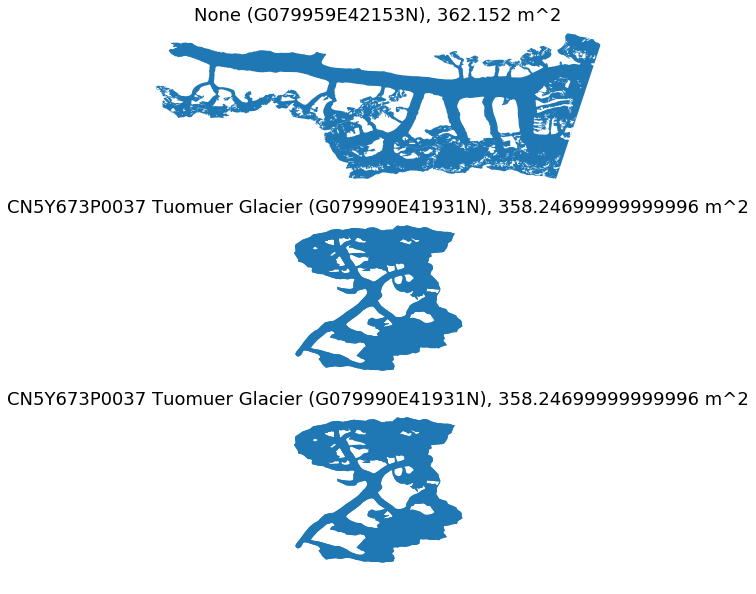

In [69]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r13_largest_pd_1.plot(ax=ax1)
ax1.set_title(r13_largest_name_1['glac_name'][0] + ' (' + r13_largest_name_1['glac_id']
              [0] + '), ' + str(r13_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r13_largest_pd_2.plot(ax=ax2)
ax2.set_title(r13_largest_name_2['glac_name'][1] + ' (' + r13_largest_name_2['glac_id']
              [1] + '), ' + str(r13_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r13_largest_pd_3.plot(ax=ax3)
ax3.set_title(r13_largest_name_3['glac_name'][2] + ' (' + r13_largest_name_3['glac_id']
              [2] + '), ' + str(r13_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 14 - Asia, South West

In [70]:
# Open GLIMS region 14
glims_region_14_fp = "data/glims/processed/cleaned/glims_region_14_cleaned.shp"
glims_polygons_r14 = gpd.read_file(glims_region_14_fp)

In [71]:
# Open GLIMS Region 14 csv file with 10 largest glaciers
glims_largest_r14 = ws.print_10_largest_glims(14)

GLIMS 10 Largest glaciers and their size for Region 14 - Asia, South West:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G077129E35401N              925.890  IN5Q151B0013 Siachen Glacier  2006-11-09T00:00:00
      G076367E35737N              631.698               Baltoro Glacier  2006-11-09T00:00:00
      G075708E35873N              482.208                 Biafo Glacier  2007-09-16T00:00:00
      G076026E36022N              359.052       Sugatyanatjilga Glacier  2010-08-23T00:00:00
      G075403E36058N              345.993                Hispar Glacier  2007-09-16T00:00:00
      G076020E35955N              317.997                Panmah Glacier  2006-11-09T00:00:00
      G074991E35994N              236.883                          None  2007-09-16T00:00:00
      G074654E36547N              236.474                Batura Glacier  2007-09-16T00:00:00
      G076662E35437N              211.613                          None  2006-11-09T00:00:00
 

In [72]:
# Open and print RGI Region 14 csv file with 10 largest glaciers
rgi_largest_r14 = ws.print_10_largest_rgi(14)

RGI 10 Largest glaciers and their size for Region 14 - Asia, South West:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G076894E35428N             1077.958  IN5Q151B0013 Siachen Glacier             20010721
      G076405E35742N              809.109               Baltoro Glacier             20010721
      G075593E36006N              559.807                 Biafo Glacier             20010721
      G075281E36055N              495.645                Hispar Glacier             20010829
      G077428E35296N              439.616     IN5Q153E0011 Rimo Glacier             20020802
      G076133E36003N              393.023       Sugatyanatjilga Glacier             20010721
      G075959E35848N              334.688                Panmah Glacier             20010721
      G074581E36501N              311.653                Batura Glacier             19990916
      G075218E35874N              295.324                 Chogo Glacier             20010829
   

In [73]:
# Select 3 largest from GLIMS Region 14
r14_largest_name_1 = glims_largest_r14.iloc[0:1]
r14_largest_pd_1 = glims_polygons_r14[glims_polygons_r14['glac_id']==r14_largest_name_1['glac_id'][0]]

r14_largest_name_2 = glims_largest_r14.iloc[1:2]
r14_largest_pd_2 = glims_polygons_r14[glims_polygons_r14['glac_id']==r14_largest_name_2['glac_id'][1]]

r14_largest_name_3 = glims_largest_r14.iloc[2:3]
r14_largest_pd_3 = glims_polygons_r14[glims_polygons_r14['glac_id']==r14_largest_name_3['glac_id'][2]]

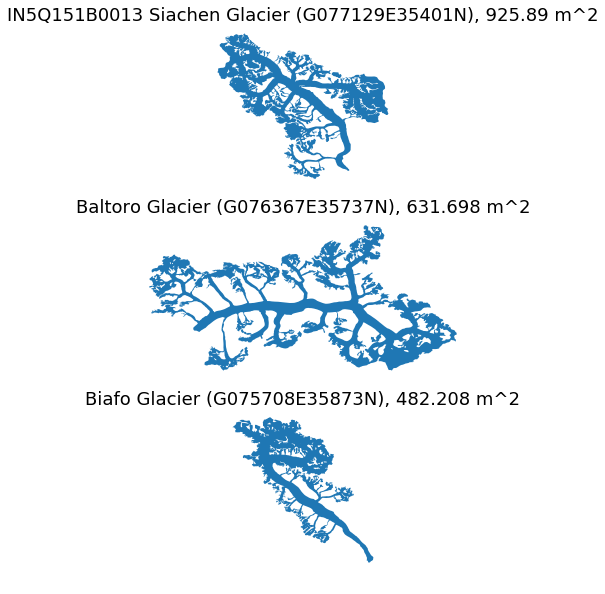

In [74]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r14_largest_pd_1.plot(ax=ax1)
ax1.set_title(r14_largest_name_1['glac_name'][0] + ' (' + r14_largest_name_1['glac_id']
              [0] + '), ' + str(r14_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r14_largest_pd_2.plot(ax=ax2)
ax2.set_title(r14_largest_name_2['glac_name'][1] + ' (' + r14_largest_name_2['glac_id']
              [1] + '), ' + str(r14_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r14_largest_pd_3.plot(ax=ax3)
ax3.set_title(r14_largest_name_3['glac_name'][2] + ' (' + r14_largest_name_3['glac_id']
              [2] + '), ' + str(r14_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 15 - Asia, South East

In [75]:
# Open GLIMS region 15
glims_region_15_fp = "data/glims/processed/cleaned/glims_region_15_cleaned.shp"
glims_polygons_r15 = gpd.read_file(glims_region_15_fp)

In [76]:
# Open GLIMS Region 15 csv file with 10 largest glaciers
glims_largest_r15 = ws.print_10_largest_glims(15)

GLIMS 10 Largest glaciers and their size for Region 15 - Asia, South East:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G096685E29331N             179.5890       Yanong Glacier  2005-09-08T00:00:00
      G096685E29331N             179.5890       Yanong Glacier  2005-09-08T00:00:00
      G079147E30802N             176.7710                 None  2008-11-09T00:00:00
      G096764E29206N             115.8930   Xirinongpu Glacier  2005-09-08T00:00:00
      G096764E29206N              96.2830   Xirinongpu Glacier  2005-09-08T00:00:00
      G086771E28015N              80.7834             Ngojumba  2009-11-08T00:00:00
      G088262E27749N              77.2696                 None  2007-12-14T00:00:00
      G088173E27791N              77.1389                 None  2010-01-20T00:00:00
      G079224E30917N              74.7588                 None  2001-09-01T00:00:00
      G086866E28050N              73.2149      Rongbuk Glacier  2010-04-09T00:00:0

In [77]:
# Open and print RGI Region 15 csv file with 10 largest glaciers
rgi_largest_r15 = ws.print_10_largest_rgi(15)

RGI 10 Largest glaciers and their size for Region 15 - Asia, South East:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G096657E29334N              179.589                          Yagnung             20050908
      G079147E30802N              121.890                 Gangotri Glacier             20010801
      G096745E29216N               96.283  CN5O282B0028 Xirinongpu Glacier             20050908
      G086830E28048N               73.215     CN5O193B0142 Rongbuk Glacier             20100409
      G088202E27766N               68.664                              NaN             20001108
      G090355E28124N               66.025   CN5O212A0300 Lianggang Glacier             20100206
      G086992E27986N               64.393   CN5O193A0059 Kangxiong Glacier             20100409
      G086716E28089N               61.054                              NaN             20001030
      G088140E27800N               58.261                              N

In [78]:
# Select 3 largest from GLIMS Region 15
r15_largest_name_1 = glims_largest_r15.iloc[0:1]
r15_largest_pd_1 = glims_polygons_r15[glims_polygons_r15['glac_id']==r15_largest_name_1['glac_id'][0]]

r15_largest_name_2 = glims_largest_r15.iloc[1:2]
r15_largest_pd_2 = glims_polygons_r15[glims_polygons_r15['glac_id']==r15_largest_name_2['glac_id'][1]]

r15_largest_name_3 = glims_largest_r15.iloc[2:3]
r15_largest_pd_3 = glims_polygons_r15[glims_polygons_r15['glac_id']==r15_largest_name_3['glac_id'][2]]

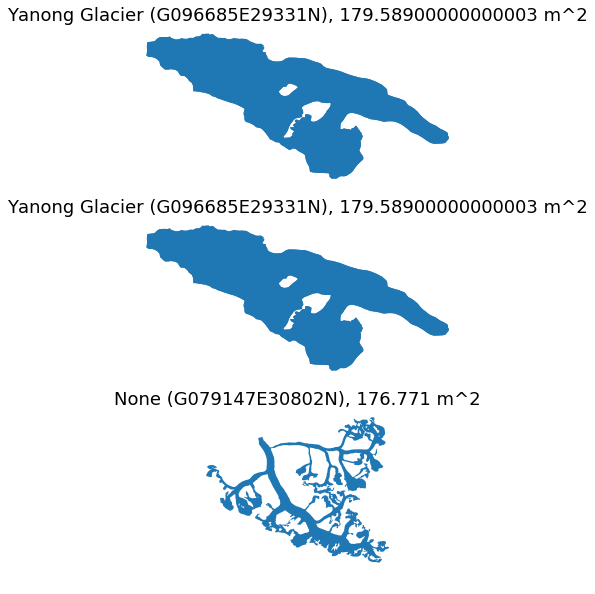

In [79]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r15_largest_pd_1.plot(ax=ax1)
ax1.set_title(r15_largest_name_1['glac_name'][0] + ' (' + r15_largest_name_1['glac_id']
              [0] + '), ' + str(r15_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r15_largest_pd_2.plot(ax=ax2)
ax2.set_title(r15_largest_name_2['glac_name'][1] + ' (' + r15_largest_name_2['glac_id']
              [1] + '), ' + str(r15_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r15_largest_pd_3.plot(ax=ax3)
ax3.set_title(r15_largest_name_3['glac_name'][2] + ' (' + r15_largest_name_3['glac_id']
              [2] + '), ' + str(r15_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 16 - Low Latitudes

In [80]:
# Open GLIMS region 16
glims_region_16_fp = "data/glims/processed/cleaned/glims_region_16_cleaned.shp"
glims_polygons_r16 = gpd.read_file(glims_region_16_fp)

In [81]:
# Open GLIMS Region 16 csv file with 10 largest glaciers
glims_largest_r16 = ws.print_10_largest_glims(16)

GLIMS 10 Largest glaciers and their size for Region 16 - Low Latitudes:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G287357E15537S              44.0166                 None  2014-11-13T00:00:00
      G282414E08866S              15.8265                 None  2005-08-28T15:33:04
      G289157E13939S              14.5374                 None  2000-06-15T00:00:00
      G288994E13746S              14.3459                 None  2000-06-15T00:00:00
      G281572E00688S              11.5150                 None  2000-06-15T00:00:00
      G288869E13760S              11.4208                 None  2000-06-15T00:00:00
      G284682E04880N              11.3776                 None  2000-06-15T00:00:00
      G290764E14677S              11.2864                 None  2000-06-15T00:00:00
      G290840E14718S              11.2142                 None  2000-06-15T00:00:00
      G287200E13256S              11.0306                 None  2000-06-15T00:00:00


In [82]:
# Open and print RGI Region 16 csv file with 10 largest glaciers
rgi_largest_r16 = ws.print_10_largest_rgi(16)

RGI 10 Largest glaciers and their size for Region 16 - Low Latitudes:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G289157E13939S               14.537                  NaN             20009999
      G288994E13746S               14.346                  NaN             20009999
      G288869E13760S               11.421                  NaN             20009999
      G284682E04880N               11.378                  NaN             20009999
      G290764E14677S               11.286                  NaN             20009999
      G290840E14718S               11.214                  NaN             20009999
      G282499E09265S               11.094                  NaN             20031018
      G287200E13256S               11.031                  NaN             20009999
      G290824E14738S               10.787                  NaN             20009999
      G282416E09090S               10.750                  NaN             20031018


In [83]:
# Select 3 largest from GLIMS Region 16
r16_largest_name_1 = glims_largest_r16.iloc[0:1]
r16_largest_pd_1 = glims_polygons_r16[glims_polygons_r16['glac_id']==r16_largest_name_1['glac_id'][0]]

r16_largest_name_2 = glims_largest_r16.iloc[1:2]
r16_largest_pd_2 = glims_polygons_r16[glims_polygons_r16['glac_id']==r16_largest_name_2['glac_id'][1]]

r16_largest_name_3 = glims_largest_r16.iloc[2:3]
r16_largest_pd_3 = glims_polygons_r16[glims_polygons_r16['glac_id']==r16_largest_name_3['glac_id'][2]]

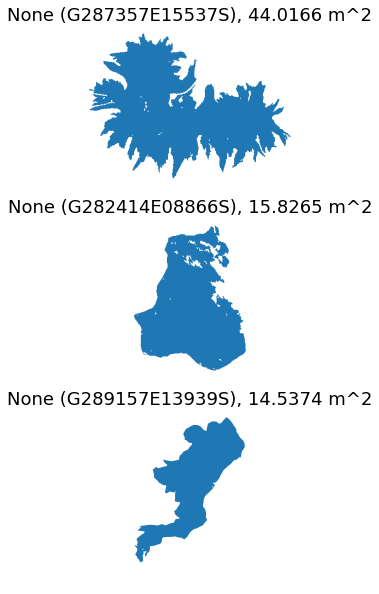

In [84]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r16_largest_pd_1.plot(ax=ax1)
ax1.set_title(r16_largest_name_1['glac_name'][0] + ' (' + r16_largest_name_1['glac_id']
              [0] + '), ' + str(r16_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r16_largest_pd_2.plot(ax=ax2)
ax2.set_title(r16_largest_name_2['glac_name'][1] + ' (' + r16_largest_name_2['glac_id']
              [1] + '), ' + str(r16_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r16_largest_pd_3.plot(ax=ax3)
ax3.set_title(r16_largest_name_3['glac_name'][2] + ' (' + r16_largest_name_3['glac_id']
              [2] + '), ' + str(r16_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 17 - Southern Andes

In [85]:
# Open GLIMS region 17
glims_region_17_fp = "data/glims/processed/cleaned/glims_region_17_cleaned.shp"
glims_polygons_r17 = gpd.read_file(glims_region_17_fp)

In [86]:
# Open GLIMS Region 17 csv file with 10 largest glaciers
glims_largest_r17 = ws.print_10_largest_glims(17)

GLIMS 10 Largest glaciers and their size for Region 17 - Southern Andes:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G286372E49263S             1344.670                 None  2007-09-06T00:00:00
      G286639E49733S              883.370                 None  2007-09-06T00:00:00
      G286651E48942S              882.787                 None  2007-09-06T00:00:00
      G286731E49384S              858.706                 None  2007-09-06T00:00:00
      G286485E46923S              782.106                 None  2007-09-06T00:00:00
      G286520E46720S              725.912                 None  2007-09-06T00:00:00
      G286336E50073S              537.971                 None  2007-09-06T00:00:00
      G286418E48657S              510.004                 None  2007-09-06T00:00:00
      G286460E47399S              494.814                 None  2007-09-06T00:00:00
      G286344E48904S              434.541                 None  2007-09-06T00:00:00


In [87]:
# Open and print RGI Region 17 csv file with 10 largest glaciers
rgi_largest_r17 = ws.print_10_largest_rgi(17)

RGI 10 Largest glaciers and their size for Region 17 - Southern Andes:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G286375E49261S             1234.714               Pio XI             20009999
      G286716E49359S              975.276               Viedma             20009999
      G286530E49887S              838.044        Upsala + Cono             20009999
      G286485E46923S              790.282          San Quintin             20011103
      G286653E48907S              762.324             OHiggins             20009999
      G286520E46720S              721.950           San Rafael             20011103
      G286440E48649S              540.832             Bernardo             20009999
      G286506E48522S              488.615          Jorge Montt             20009999
      G286347E50060S              469.756              Penguin             20009999
      G286344E48904S              428.611                Greve             20009999


In [88]:
# Select 3 largest from GLIMS Region 17
r17_largest_name_1 = glims_largest_r17.iloc[0:1]
r17_largest_pd_1 = glims_polygons_r17[glims_polygons_r17['glac_id']==r17_largest_name_1['glac_id'][0]]

r17_largest_name_2 = glims_largest_r17.iloc[1:2]
r17_largest_pd_2 = glims_polygons_r17[glims_polygons_r17['glac_id']==r17_largest_name_2['glac_id'][1]]

r17_largest_name_3 = glims_largest_r17.iloc[2:3]
r17_largest_pd_3 = glims_polygons_r17[glims_polygons_r17['glac_id']==r17_largest_name_3['glac_id'][2]]

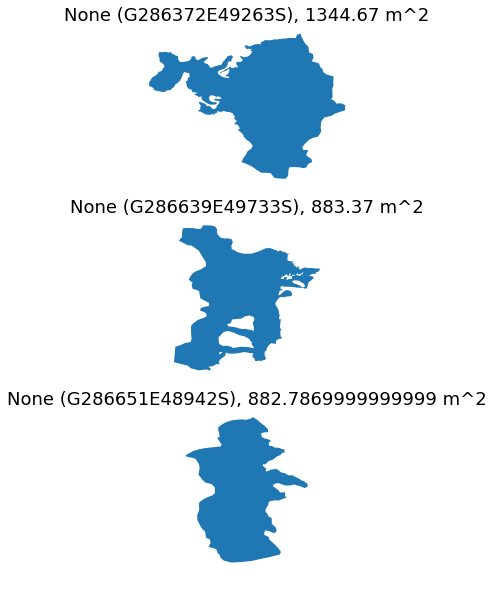

In [89]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r17_largest_pd_1.plot(ax=ax1)
ax1.set_title(r17_largest_name_1['glac_name'][0] + ' (' + r17_largest_name_1['glac_id']
              [0] + '), ' + str(r17_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r17_largest_pd_2.plot(ax=ax2)
ax2.set_title(r17_largest_name_2['glac_name'][1] + ' (' + r17_largest_name_2['glac_id']
              [1] + '), ' + str(r17_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r17_largest_pd_3.plot(ax=ax3)
ax3.set_title(r17_largest_name_3['glac_name'][2] + ' (' + r17_largest_name_3['glac_id']
              [2] + '), ' + str(r17_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 18 - New Zealand

In [90]:
# Open GLIMS region 18
glims_region_18_fp = "data/glims/processed/cleaned/glims_region_18_cleaned.shp"
glims_polygons_r18 = gpd.read_file(glims_region_18_fp)

In [91]:
# Open GLIMS Region 18 csv file with 10 largest glaciers
glims_largest_r18 = ws.print_10_largest_glims(18)

GLIMS 10 Largest glaciers and their size for Region 18 - New Zealand:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G170307E43519S              87.7027                 None  2009-02-17T22:38:29
      G170162E43537S              34.3114                 None  2009-02-17T22:38:29
      G170225E43495S              33.0838                 None  2009-02-17T22:38:29
      G170406E43522S              28.8104                 None  2009-02-17T22:38:29
      G168764E44358S              22.8197                 None  1978-01-01T00:00:00
      G168713E44394S              15.4969                 None  1978-01-01T00:00:00
      G170016E43750S              13.9150                 None  2009-02-17T22:38:29
      G170016E43750S              13.9150                 None  2009-02-17T22:38:29
      G170591E43444S              13.7584                 None  1978-01-01T00:00:00
      G170112E43607S              13.3457                 None  2009-02-17T22:38:29


In [92]:
# Open and print RGI Region 18 csv file with 10 largest glaciers
rgi_largest_r18 = ws.print_10_largest_rgi(18)

RGI 10 Largest glaciers and their size for Region 18 - New Zealand:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G170238E43565S               95.216       Tasman Glacier             19789999
      G170156E43531S               34.715                  NaN             19789999
      G170220E43493S               33.107                  NaN             19789999
      G170379E43558S               31.433                  NaN             19789999
      G168764E44358S               22.820                  NaN             19789999
      G168713E44394S               15.497                  NaN             19789999
      G170118E43618S               14.383                  NaN             19789999
      G170034E43739S               13.908                  NaN             19789999
      G170591E43444S               13.758                  NaN             19789999
      G170697E43314S               11.678                  NaN             19789999


In [93]:
# Select 3 largest from GLIMS Region 18
r18_largest_name_1 = glims_largest_r18.iloc[0:1]
r18_largest_pd_1 = glims_polygons_r18[glims_polygons_r18['glac_id']==r18_largest_name_1['glac_id'][0]]

r18_largest_name_2 = glims_largest_r18.iloc[1:2]
r18_largest_pd_2 = glims_polygons_r18[glims_polygons_r18['glac_id']==r18_largest_name_2['glac_id'][1]]

r18_largest_name_3 = glims_largest_r18.iloc[2:3]
r18_largest_pd_3 = glims_polygons_r18[glims_polygons_r18['glac_id']==r18_largest_name_3['glac_id'][2]]

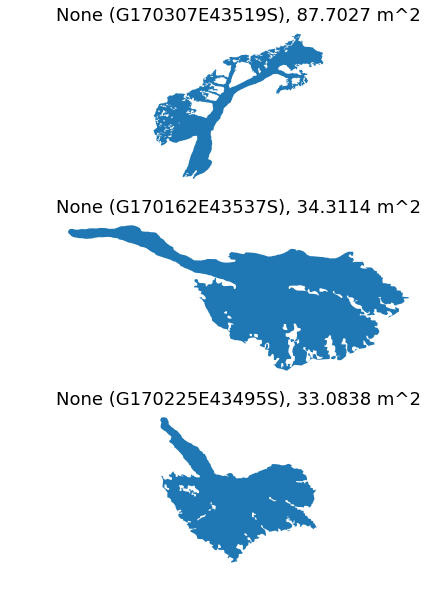

In [94]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r18_largest_pd_1.plot(ax=ax1)
ax1.set_title(r18_largest_name_1['glac_name'][0] + ' (' + r18_largest_name_1['glac_id']
              [0] + '), ' + str(r18_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r18_largest_pd_2.plot(ax=ax2)
ax2.set_title(r18_largest_name_2['glac_name'][1] + ' (' + r18_largest_name_2['glac_id']
              [1] + '), ' + str(r18_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r18_largest_pd_3.plot(ax=ax3)
ax3.set_title(r18_largest_name_3['glac_name'][2] + ' (' + r18_largest_name_3['glac_id']
              [2] + '), ' + str(r18_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

### Region 19 - Antarctic and Subantarctic

In [95]:
# Open GLIMS region 19
glims_region_19_fp = "data/glims/processed/cleaned/glims_region_19_cleaned.shp"
glims_polygons_r19 = gpd.read_file(glims_region_19_fp)

In [96]:
# Open GLIMS Region 19 csv file with 10 largest glaciers
glims_largest_r19 = ws.print_10_largest_glims(19)

GLIMS 10 Largest glaciers and their size for Region 19 - Antarctic and Subantarctic:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G294015E69537S              7018.32         Seller Glacier  2002-12-31T00:00:00
      G238773E74044S              6004.85      Carney Island IC,  1956-02-01T00:00:00
      G260838E72287S              5260.71        Thurston I 001,  1972-12-04T00:00:00
      G289107E72447S              4766.14                   None  1997-09-01T00:00:00
      G288531E71248S              3980.42                   None  1997-09-01T00:00:00
      G290150E71851S              3533.65                   None  1997-09-01T00:00:00
      G294357E68789S              3499.43  Mercator Ice Piedmont  2002-12-31T00:00:00
      G284989E70860S              3436.40      Latady Island IC,  1990-01-27T00:00:00
      G281634E72693S              3311.60      Smyley Island IC,  1989-01-24T00:00:00
      G284892E73195S              3266.69      Spaatz 

In [97]:
# Open and print RGI Region 19 csv file with 10 largest glaciers
rgi_largest_r19 = ws.print_10_largest_rgi(19)

RGI 10 Largest glaciers and their size for Region 19 - Antarctic and Subantarctic:

      Glacier ID               Area (m^2)      Glacier Name       Date of Measurement
      G238773E74044S             6004.845     Carney Island IC             -9999999
      G260838E72287S             5260.723       Thurston I 001             19721204
      G289107E72447S             4766.142                  NaN             19970901
      G288531E71248S             3980.427                  NaN             19970901
      G290150E71851S             3533.646                  NaN             19970901
      G284989E70860S             3436.404     Latady Island IC             19900127
      G281634E72693S             3311.602     Smyley Island IC             19890124
      G284892E73195S             3266.694     Spaatz Island IC             19970901
      G233765E73569S             2938.121    W Siple Island IC             -9999999
      G285457E71860S             2657.737                  NaN            

In [98]:
# Select 3 largest from GLIMS Region 19
r19_largest_name_1 = glims_largest_r19.iloc[0:1]
r19_largest_pd_1 = glims_polygons_r19[glims_polygons_r19['glac_id']==r19_largest_name_1['glac_id'][0]]

r19_largest_name_2 = glims_largest_r19.iloc[1:2]
r19_largest_pd_2 = glims_polygons_r19[glims_polygons_r19['glac_id']==r19_largest_name_2['glac_id'][1]]

r19_largest_name_3 = glims_largest_r19.iloc[2:3]
r19_largest_pd_3 = glims_polygons_r19[glims_polygons_r19['glac_id']==r19_largest_name_3['glac_id'][2]]

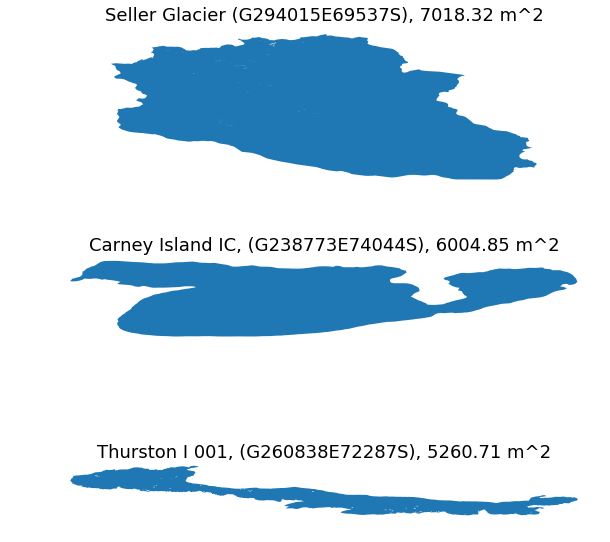

In [99]:
# Plot the 3 largest
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

# Plot largest glacier
r19_largest_pd_1.plot(ax=ax1)
ax1.set_title(r19_largest_name_1['glac_name'][0] + ' (' + r19_largest_name_1['glac_id']
              [0] + '), ' + str(r19_largest_name_1['db_area'][0]) + ' m^2', fontsize=18)
ax1.set_axis_off()

# Plot second largest glacier
r19_largest_pd_2.plot(ax=ax2)
ax2.set_title(r19_largest_name_2['glac_name'][1] + ' (' + r19_largest_name_2['glac_id']
              [1] + '), ' + str(r19_largest_name_2['db_area'][1]) + ' m^2', fontsize=18)
ax2.set_axis_off()

# Plot second largest glacier
r19_largest_pd_3.plot(ax=ax3)
ax3.set_title(r19_largest_name_3['glac_name'][2] + ' (' + r19_largest_name_3['glac_id']
              [2] + '), ' + str(r19_largest_name_3['db_area'][2]) + ' m^2', fontsize=18)
ax3.set_axis_off()

# Conclusion/Summary

This preliminary analysis shows plots of the 3 largest glaciers for each of the 19 glacier regions based on the GLIMS database. Work still needs to be done to compare the 3 largest from the RGI database and compare them. There are some issues with the GLIMS database that need to be cleared up. They are the following:
* For region 10, the plot of the largest glacier, Toll Ice Cap, does not look correct since it is just an oval. Also, need to define what I mean by glacier. That is, should ice caps be included at all.
* For region 15, Yanong Glacier is listed as the both the largest and second largest. Need to investigate why that is occurring.
* For region 3 (and some others), the glacier name is "None" in the GLIMS database but these glaciers do have names in the RGI database. Will want to cross-compare to determine the names of the glaciers and possible suggest improvements to the GLIMS team and CU Boulder for the GLIMS database.

Other work yet to be completed is to find the largest glacier out of all of these to determine the largest glacier in the world. From a manual inspection of the glaciers listed above, Vatnajokull Glacier in Region 6 - Iceland at 8091.6700 m^2 is the largest. Now need to see if the RGI agrees and also do some literature research to determine if the values from GLIMS and RGI are accurate. Then a full report and an education and outreach web page needs to be created.